<a href="https://colab.research.google.com/github/shivan-21/LIF-Model/blob/main/Neurolib_ALN_model_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neurolib
import matplotlib.pyplot as plt
import numpy as np
import scipy
# for some useful functions used
import neurolib.utils.functions as func

# a nice colour scheme for the colour map
plt.rcParams['image.cmap'] = 'plasma'



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.0/315.0 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.2 MB/s eta 0:00:00
  Created wheel for jitcdde: filename=jitcdde-1.8.1-py3-none-any.whl size=55002 sha256=a633d263af1ae283c0b40b4133916e46fd053366d8108c835899fc2010995530
  Stored in directory: /root/.cache/pip/wheels/42/e3/4e/94b61188e5e3e62ba27e9586da5ecc7ea0f24e26916a250cc7
  Created wheel for pypet: filename=pypet-0.6.1-py3-none-any.whl size=345821 sha256=8da79f2a67

In [ ]:
# import aln model
from neurolib.models.aln import ALNModel




In [ ]:
# Create the model
aln = ALNModel()
# default parameters stored in dictionary,
aln.params['duration'] = 10.0 * 1000  # multiplies duration to 100 ms, SHORTCUT is aln.params.duration = 10.0 * 1000
# sigma_ou is a parameter to control the variance of the noise flucutations
aln.params['sigma_ou'] = 0.1

# run model
aln.run()




In [ ]:
# Access Outputs
aln.outputs.keys()
time = aln['t'] # gives runtime in ms
exc_rate =aln.rates_exc.shape # gives the excitatory firing rate output
output = aln.output


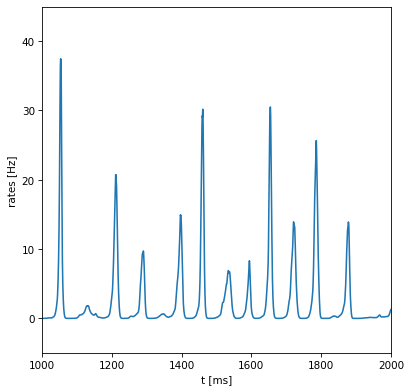

In [ ]:
output = output.squeeze()  # Removes dimensions of size 1 since output is (1000,1)
output.shape

# Now plot the data
#plt.plot(time, output)

# plot a pretty figure
plt.figure(figsize = (6,6), dpi =75) # dpi, dots per inch
plt.plot(aln['t'], aln['rates_exc'].T)
plt.xlabel('t [ms]')
plt.ylabel('rates [Hz]')
plt.xlim(1000,2000)
plt.ylim(-5,45)
plt.show()

In [ ]:
# External currents to each sub-population are v imp parameters to the model
# mue_ext_mean, which is a terrible way of saying "mean input current to the excitatory subpopulation"
mue_ext_mean = aln.params["mue_ext_mean"]





In [ ]:
# initialize the model
aln = ALNModel()
aln.params['duration'] = 2.0*1000 # set duration

# lists that will contain the results
max_outputs = []
min_outputs = []
# these are the different input values that we want to scan
inputs = np.linspace(0, 2, 50)

# cycle through all input values
for mue in inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    aln.params['mue_ext_mean'] = mue
    aln.run()
    # we add the maximum and the minimum of the last second of the
    # simulation to a list
    max_outputs.append(np.max(aln.output[0, -int(1000/aln.params['dt']):]))
    min_outputs.append(np.min(aln.output[0, -int(1000/aln.params['dt']):]))


Text(0, 0.5, 'min/max firing rates [Hz]')

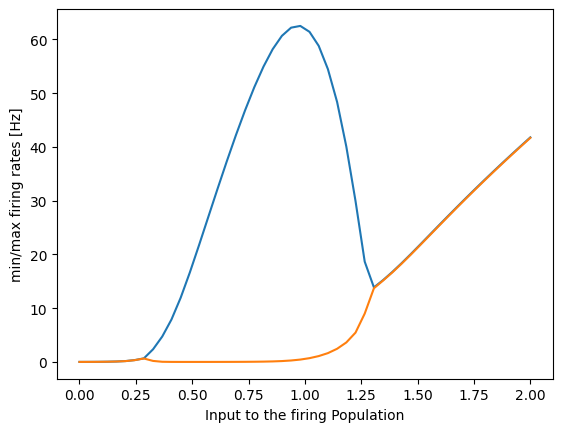

In [ ]:
# down state, up state and oscillatory state
plt.plot(inputs, max_outputs)
plt.plot(inputs, min_outputs)
plt.xlabel('Input to the firing Population')
plt.ylabel('min/max firing rates [Hz]')


In [ ]:
# Load dataset for ALN model with data from the Human connectome project
#  objects ds.Cmat and ds.Dmat represent the structural connectivity and the fiber length matrix averaged over all subjects of the dataset
from neurolib.utils.loadData import Dataset
ds = Dataset("hcp")
#The connectivity matrix is a N by N numpy.array with it's entries representing the coupling strength between all brain areas
ds.Dmat.shape

(80, 80)

In [ ]:
# Load the modl with the structural dataset
aln = ALNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

# Let's run the simulation for a few minutes
aln.params['duration'] = 3*60*1000


In [ ]:
aln.params['mue_ext_mean'] = 1.57
aln.params['mui_ext_mean'] = 1.6
# We set an appropriate level of noise
aln.params['sigma_ou'] = 0.09
# And turn on adaptation with a low value of spike-triggered adaptation currents.
aln.params['b'] = 5.0


**Slicing recap**



*   The matrix[1, :] slice selects all elements in the second row, showing how to slice rows.
*   The matrix[:, 2] slice selects all elements in the third column, demonstrating column slicing.
* The matrix[:2, :3] slice selects the first two rows and the first three columns, creating a submatrix.






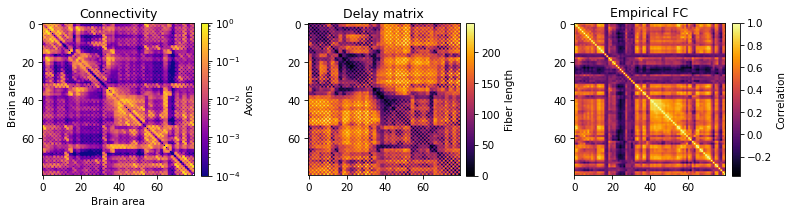

In [ ]:
# visualise the data
from matplotlib.colors import LogNorm

fig, axs = plt.subplots(1, 3, figsize=(12,8), dpi=75)
fig.subplots_adjust(wspace=0.6)

# plot Connectivity Matrix
im = axs[0].imshow(aln.params['Cmat'], norm=LogNorm(vmin=10e-5, vmax=np.max(aln.params['Cmat'])))
axs[0].set_title("Connectivity")
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04, label='Axons')
# Plot the Delay Matrix
im = axs[1].imshow(aln.params['lengthMat'], cmap='inferno')
axs[1].set_title("Delay matrix")
fig.colorbar(im, ax=axs[1],fraction=0.046, pad=0.04, label='Fiber length')

# Plot the functional connectivity
im = axs[2].imshow(ds.FCs[0], cmap='inferno')
axs[2].set_title("Empirical FC")
fig.colorbar(im, ax=axs[2],fraction=0.046, pad=0.04, label='Correlation')

axs[0].set_xlabel("Brain area")
axs[0].set_ylabel("Brain area")
plt.show()

In [ ]:
# We run the model with bold simulation by using bold=True. This simulates the Balloon-Windkessel BOLD model in parallel
# in order to estimate the blood oxygen levels of the underlying neural activity
#
aln.run(chunkwise=True, chunksize = 100000, bold=True)


In [ ]:
# analyse the simulation keys
aln.outputs.keys()


dict_keys(['t', 'rates_exc', 'rates_inh', 'IA', 'BOLD'])

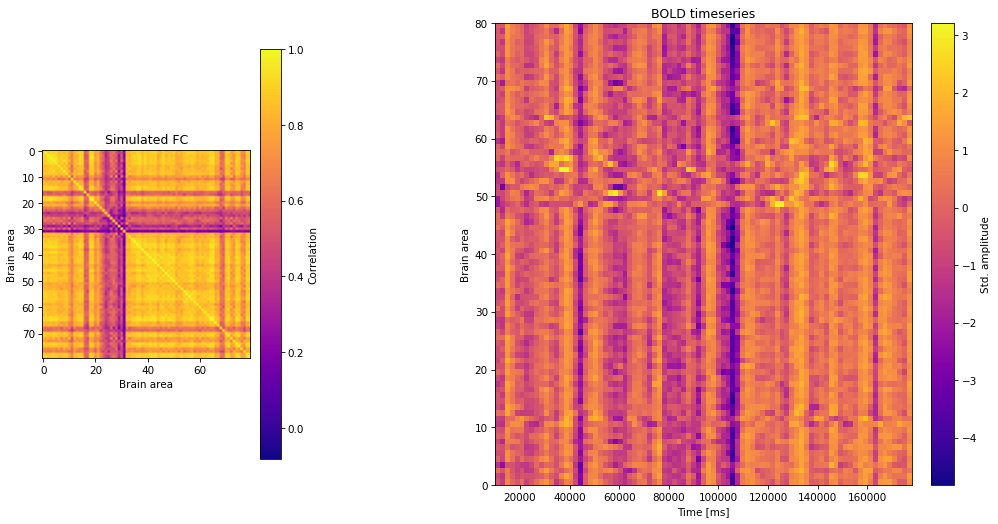

In [ ]:
#hide_input
# Plot functional connectivity and BOLD timeseries (z-scored)
fig, axs = plt.subplots(1, 2, figsize=(16, 8), dpi=75, gridspec_kw={'width_ratios' : [1, 2]})
fig.subplots_adjust(wspace=0.6)

# Plot simulated functional connectivity
im = axs[0].imshow(func.fc(aln.BOLD.BOLD[:, 5:]))
# func.fc(aln.BOLD.BOLD[:, 5:]) Computes the functional connectivity (FC) matrix from the BOLD signal
# the first 5 time steps are excluded to avoid transient effects.
fig.colorbar(im, ax=axs[0],fraction=0.086, pad=0.04, label='Correlation')
axs[0].set_title("Simulated FC")
axs[0].set_xlabel("Brain area")
axs[0].set_ylabel("Brain area")

# Plot Correl
im = axs[1].imshow(scipy.stats.mstats.zscore(aln.BOLD.BOLD[:, aln.BOLD.t_BOLD>10000], axis=1), aspect='auto', extent=[aln.BOLD.t_BOLD[aln.BOLD.t_BOLD>10000][0], aln.BOLD.t_BOLD[-1], 0, aln.params['N']]);
fig.colorbar(im, ax=axs[1],fraction=0.086, pad=0.04, label='Std. amplitude')
# scipy.stats.mstats.zscore normalises time series to unit std deviation and makes it mean centred
# aln.BOLD.BOLD[:, aln.BOLD.t_BOLD > 10000] skips first 100000 seconds to skip transient dynaimcs
# aspect='auto' for auto aspect ratio


axs[1].set_title("BOLD timeseries")
axs[1].set_xlabel("Time [ms]")
axs[1].set_ylabel("Brain area")
plt.show()

# due to chunking, this only shows the last chunk and not the whole time series


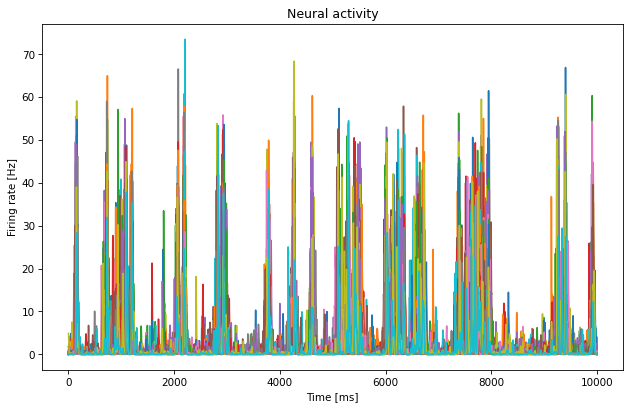

In [ ]:
# the results of the model are also accesible through an xarray DataArray- a flexible data type to handle labelled multi dimensional data
fig, axs = plt.subplots(1, 1, figsize=(10, 6), dpi=75)
# plot firing rate vs
axs.plot(aln.xr().time, aln.xr().loc['rates_exc'].T);
# .loc is a method to accesss specific data based on labels
# .T takes the transpose to ensure the data is organized with: Time points on the X-axis and Brain areas or neurons on the Y-axis
axs.set_title("Neural activity")
axs.set_xlabel("Time [ms]")
axs.set_ylabel("Firing rate [Hz]")
plt.show()


# Better Way to Visualise Node Activity


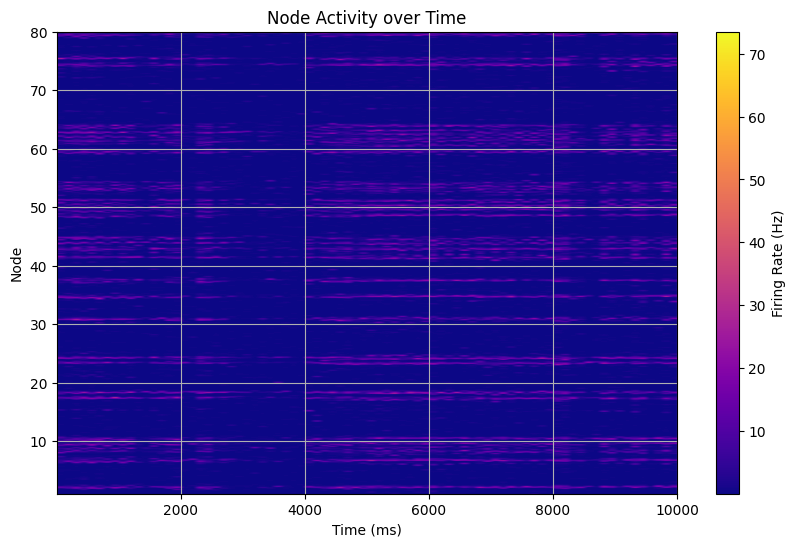

In [ ]:
# olour plot using imshow. The y-axis must have the nodes from 1-80 and the x =- axis should be time. Let the firing rate for each node be given by the intensity of colour

# Assuming 'aln' and its outputs are defined as in the provided code
# Replace with your actual data if different
time = aln['t']
rates_exc = aln['rates_exc']
rates_exc.size
# Create the plot
plt.figure(figsize=(10, 6))
plt.imshow(rates_exc.T, aspect='auto', origin='lower', extent=[time[0], time[-1], 1, 80])
plt.colorbar(label='Firing Rate (Hz)')
plt.xlabel('Time (ms)')
plt.ylabel('Node')
plt.title('Node Activity over Time')
#plt.grid()
plt.show()

In [ ]:
test_mat= np.random.rand(3,3)
test_mat

array([[0.0152561 , 0.19667483, 0.6821651 ],
       [0.10205002, 0.25491863, 0.25124401],
       [0.77462913, 0.18610719, 0.25136532]])

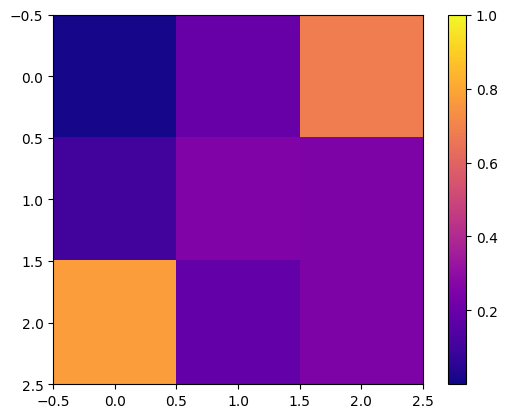

In [ ]:
plt.imshow(test_mat, vmin=1e-5, vmax=1)  # Set vmin and vmax for imshow
plt.colorbar()  # Remove min and max arguments from colorbar
plt.show()